In [1]:
import os
import torch
import matplotlib.pyplot as plt
from bball3_env import BBall3Env
from bball3_mj_env import BBall3MJEnv
import numpy as np
import time

torch.set_default_dtype(torch.float32)
def do_rollout(init_point=None, render=False, video=False):
    #env = gym.make(env_name, **env_config)
    torch.autograd.set_grad_enabled(False)
    obs = env.reset()
    obs = torch.as_tensor(obs, dtype=torch.float32)

    acts_list = []
    obs1_list = []
    rews_list = []

    dtype = torch.float32
    act_size = env.action_space.shape[0]
    obs_size = env.observation_space.shape[0]

    done = False
    cur_step = 0

    while not done:
        acts, _  = agent.model.select_action(obs.reshape(1,-1), np.zeros((1,act_size)))
        #import ipdb; ipdb.set_trace()
        obs, rew, done, out = env.step(acts.numpy())
          
        if render:
            env.render()
            time.sleep(.01)
            
        obs1_list.append(obs)
        obs = torch.as_tensor(obs, dtype=dtype)

        acts_list.append(torch.as_tensor(acts.squeeze()))
        rews_list.append(torch.as_tensor(rew, dtype=dtype))
        cur_step += 1

    ep_obs1 = torch.tensor(obs1_list)
    ep_acts = torch.stack(acts_list)
    ep_rews = torch.stack(rews_list)
    torch.autograd.set_grad_enabled(True)

    return ep_obs1, ep_acts, ep_rews

/home/sgillen/work/seagul/seagul/envs/__init__.py:55: UserWarning: Warning, pybullet envs not installed
  warnings.warn("Warning, pybullet envs not installed")
/home/sgillen/work/seagul/seagul/envs/__init__.py:131: UserWarning: Warning, rllib environments not registered
  warnings.warn("Warning, rllib environments not registered")


running build_ext


In [6]:
#bball/python/data_sac/tn0/seed3066375725/reward_fn.py
trial_dir = "/home/sgillen/work/bball/python/data_sac/mj_infu_long"
agent_list = []
for entry in os.scandir(trial_dir):
    exec(open(entry.path + "/reward_fn.py").read()) # reward_fn defined here
    agent = torch.load(entry.path + "/agent.ag")
    agent_list.append(agent)
    
env = BBall3MJEnv(**agent.env_config)

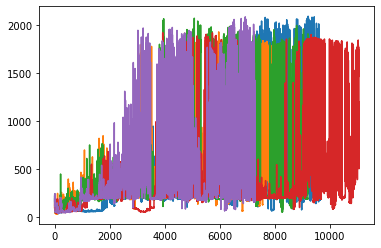

In [7]:
for agent in agent_list:
    plt.plot(agent.raw_rew_hist)
    
# min_length = int(min_length)
# rewards = np.zeros((min_length, len(ws_list)))
# for i, ws in enumerate(ws_list):
#     rewards[:, i] = np.array(ws["raw_rew_hist"][:min_length])

In [ ]:
obs_hist, act_hist, rew_hist = do_rollout(render=True)

print(f"reward sum: {sum(rew_hist)}")

plt.step([i for i in range(act_hist.shape[0])], act_hist, 'k')
plt.title('Actions')
plt.xlabel('Time (seconds)')
plt.ylabel('Torque (Nm)')
plt.grid()
#plt.savefig(script_path + '../figs/act_hist.png')
plt.show(); plt.figure()

plt.plot(obs_hist)

plt.title('States')
plt.xlabel('Time ticks')
plt.ylabel('States (mixed units)')
plt.grid()
#plt.savefig(script_path + '../figs/obs_hist.png')
plt.show()

> <ipython-input-1-1ac530d5efb5>(30)do_rollout()
     29         import ipdb; ipdb.set_trace()
---> 30         obs, rew, done, out = env.step(acts.numpy())
     31 

--KeyboardInterrupt--
--KeyboardInterrupt--
--KeyboardInterrupt--
--KeyboardInterrupt--


In [ ]:
env.eng.clf()
obs_list = []
for obs in obs_hist:
    obs_list.append(obs.tolist())
import matlab
tout = matlab.single([float(i) for i in range(obs_hist.shape[0])])
env.animate(tout,matlab.single(obs_list))